In [52]:

## electricity_generation_emission_v1.0

## data source: 
## 1. annual_electricity_generation_emission.csv

## result: electricity_generation_emission.csv
## columns: 
#### per_generation_per_co2_emission -- the lastest time
#### update_time

## main idea:
## 1. select the latest "co2_emission_per_generation" data as the input standard


## the following step:
## 2. according to the current data, use different model to predicte the latest data
## 3. use the latest data as the standard


In [53]:

## import the related library
import pandas as pd 
import time
import numpy as np

import statsmodels.api as sm
import matplotlib.pyplot as plt
%matplotlib inline


#from sklearn.linear_model import LinearRegression
#from sklearn.preprocessing import PolynomialFeatures


In [54]:

## read the excel file
read_data = pd.read_csv('/Users/cuimingyue/Documents/5120/code/wrangling_data/data_wrangling_v5.0_06:05:2019/result table/annual_electricity_generation_emission.csv', encoding='utf-8')
## you can use code "excel_data.sheet_names" to check the sheetname

data = read_data[['year','co2_emission_per_generation','update_time']]

data

year  co2_emission_per_generation          update_time
0   1991                     0.007668  2019-05-08 23:37:39
1   1992                     0.015445  2019-05-08 23:37:39
2   1993                     0.018915  2019-05-08 23:37:39
3   1994                     0.026596  2019-05-08 23:37:39
4   1995                     0.042116  2019-05-08 23:37:39
5   1996                     0.055365  2019-05-08 23:37:39
6   1997                     0.071904  2019-05-08 23:37:39
7   1998                     0.096083  2019-05-08 23:37:39
8   1999                     0.106788  2019-05-08 23:37:39
9   2000                     0.111763  2019-05-08 23:37:39
10  2001                     0.129227  2019-05-08 23:37:39
11  2002                     0.127014  2019-05-08 23:37:39
12  2003                     0.126453  2019-05-08 23:37:39
13  2004                     0.142340  2019-05-08 23:37:39
14  2005                     0.139401  2019-05-08 23:37:39
15  2006                     0.147402  2019-05-08 23:37:39
16  2007                     0.149166  2019-05-08 23:37:39
17  2008                     0.149463  2019-05-08 23:37:39
18  2009                     0.151703  2019-05-08 23:37:39
19  2010                     0.155730  2019-05-08 23:37:39
20  2011                     0.143902  2019-05-08 23:37:39
21  2012                     0.140131  2019-05-08 23:37:39
22  2013                     0.123759  2019-05-08 23:37:39
23  2014                     0.117659  2019-05-08 23:37:39
24  2015                     0.128522  2019-05-08 23:37:39
25  2016                     0.134403  2019-05-08 23:37:39

In [55]:

data_x = data['year']

data_y = data['co2_emission_per_generation']


In [56]:

from sklearn.model_selection import train_test_split

train_x, valid_x, train_y, valid_y = train_test_split(data_x, data_y, test_size=0.33, random_state = 1)



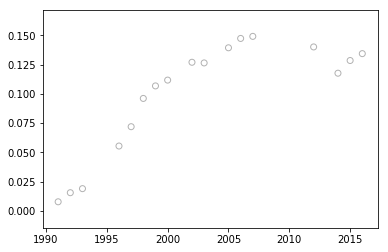

In [57]:

import matplotlib.pyplot as plt

plt.scatter(train_x, train_y, facecolor='None', edgecolor='k', alpha=0.3)
plt.show()


[ 4.81151046e-03 -9.53638846e+00]


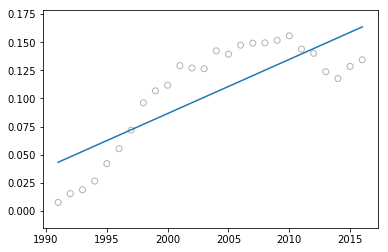

In [58]:

weights = np.polyfit(train_x, train_y, 1)
print(weights)

model1 = np.poly1d(weights)
pred = model1(valid_x)

xp = data_x
pred_plot = model1(xp)

plt.scatter(data_x, data_y, facecolor='None', edgecolor='k', alpha=0.3)
plt.plot(xp, pred_plot)
plt.show()


In [59]:

weights = np.polyfit(train_x, train_y, 2)
print(weights)

model2 = np.poly1d(weights)
pred = model2(valid_x)

xp = data_x
pred_plot = model2(xp)

plt.scatter(data_x, data_y, facecolor='None', edgecolor='k', alpha=0.3)
plt.plot(xp, pred_plot)
plt.show()


[-4.62639660e-04  1.85883598e+00 -1.86700429e+03]


[-2.99122996e-06  1.75141410e-02 -3.41532790e+01  2.21799418e+04]


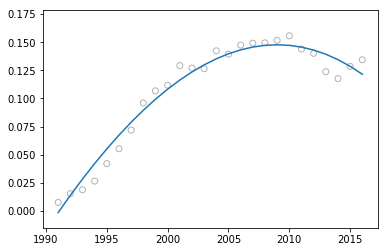

In [60]:

weights = np.polyfit(train_x, train_y, 3)
print(weights)

model3 = np.poly1d(weights)
pred = model3(valid_x)

xp = data_x
pred_plot = model3(xp)

plt.scatter(data_x, data_y, facecolor='None', edgecolor='k', alpha=0.3)
plt.plot(xp, pred_plot)
plt.show()


[ 2.67477348e-06 -2.14353499e-02  6.44168672e+01 -8.60360111e+04
  4.30909769e+07]


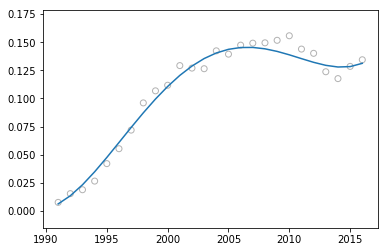

In [61]:

weights = np.polyfit(train_x, train_y, 4)
print(weights)

model4 = np.poly1d(weights)
pred = model4(valid_x)

xp = data_x
pred_plot = model4(xp)

plt.scatter(data_x, data_y, facecolor='None', edgecolor='k', alpha=0.3)
plt.plot(xp, pred_plot)
plt.show()


[-2.72150916e-08  2.75329267e-04 -1.11406621e+00  2.25370146e+03
 -2.27934054e+06  9.22019571e+08]


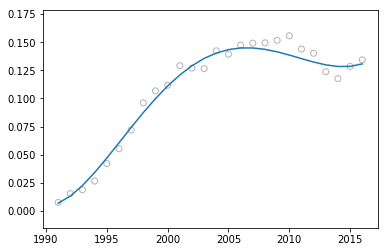

In [62]:
weights = np.polyfit(train_x, train_y, 5)
print(weights)

model5 = np.poly1d(weights)
pred = model5(valid_x)

xp = data_x
pred_plot = model5(xp)

plt.scatter(data_x, data_y, facecolor='None', edgecolor='k', alpha=0.3)
plt.plot(xp, pred_plot)
plt.show()

In [63]:
x2017 = [2017]
y2017 = model5(x2017)
predict_2017 = y2017.tolist()[0]

In [64]:
x2018 = [2018]
y2018 = model5(x2018)
predict_2018 = y2018.tolist()[0]

In [65]:

num = len(data)
update_time = time.strftime("%Y-%m-%d %H:%M:%S",time.localtime(time.time()))


In [66]:
data.loc[num] = ['2017', predict_2017, update_time]
data.loc[num+1] = ['2018', predict_2018, update_time]
data

/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.
/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


year  co2_emission_per_generation          update_time
0   1991                     0.007668  2019-05-08 23:37:39
1   1992                     0.015445  2019-05-08 23:37:39
2   1993                     0.018915  2019-05-08 23:37:39
3   1994                     0.026596  2019-05-08 23:37:39
4   1995                     0.042116  2019-05-08 23:37:39
5   1996                     0.055365  2019-05-08 23:37:39
6   1997                     0.071904  2019-05-08 23:37:39
7   1998                     0.096083  2019-05-08 23:37:39
8   1999                     0.106788  2019-05-08 23:37:39
9   2000                     0.111763  2019-05-08 23:37:39
10  2001                     0.129227  2019-05-08 23:37:39
11  2002                     0.127014  2019-05-08 23:37:39
12  2003                     0.126453  2019-05-08 23:37:39
13  2004                     0.142340  2019-05-08 23:37:39
14  2005                     0.139401  2019-05-08 23:37:39
15  2006                     0.147402  2019-05-08 23:37:39
16  2007                     0.149166  2019-05-08 23:37:39
17  2008                     0.149463  2019-05-08 23:37:39
18  2009                     0.151703  2019-05-08 23:37:39
19  2010                     0.155730  2019-05-08 23:37:39
20  2011                     0.143902  2019-05-08 23:37:39
21  2012                     0.140131  2019-05-08 23:37:39
22  2013                     0.123759  2019-05-08 23:37:39
23  2014                     0.117659  2019-05-08 23:37:39
24  2015                     0.128522  2019-05-08 23:37:39
25  2016                     0.134403  2019-05-08 23:37:39
26  2017                     0.135626  2019-05-10 01:56:15
27  2018                     0.143791  2019-05-10 01:56:15

In [69]:
## choose the latest data as the stardard
max_num = len(data)
max_num = max_num -1
latest_data = pd.DataFrame(data.loc[max_num]).T
latest_data

year co2_emission_per_generation          update_time
27  2018                    0.143791  2019-05-10 01:56:15

In [70]:

## choose the "co2_emission_per_generation", "update_time" column as the input data
electricity_generation_emission = latest_data.loc[:,'co2_emission_per_generation':'update_time']

electricity_generation_emission


co2_emission_per_generation          update_time
27                    0.143791  2019-05-10 01:56:15

In [71]:

electricity_generation_emission.index = range(len(electricity_generation_emission.index))

## set the index column name
electricity_generation_emission.index.name = 'electricity_generation_emission_id' 


electricity_generation_emission


co2_emission_per_generation  \
electricity_generation_emission_id                               
0                                                     0.143791   

                                            update_time  
electricity_generation_emission_id                       
0                                   2019-05-10 01:56:15

In [73]:

## write out the “australia_electricity_generation” csv files
electricity_generation_emission.to_csv('/Users/cuimingyue/Documents/5120/code/wrangling_data/data_wrangling_v5.0_06:05:2019/result table/electricity_generation_emission.csv', encoding='utf-8')

